✅ Successfully loaded data from '/kaggle/input/liver-cihrrosis/liver_cirrhosis.csv'. Shape: (25000, 19)
✅ Model training complete.

📊 Model Accuracy: 0.95

📋 Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95      1653
           2       0.93      0.95      0.94      1688
           3       0.97      0.96      0.97      1659

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000


🤔 Confusion Matrix:


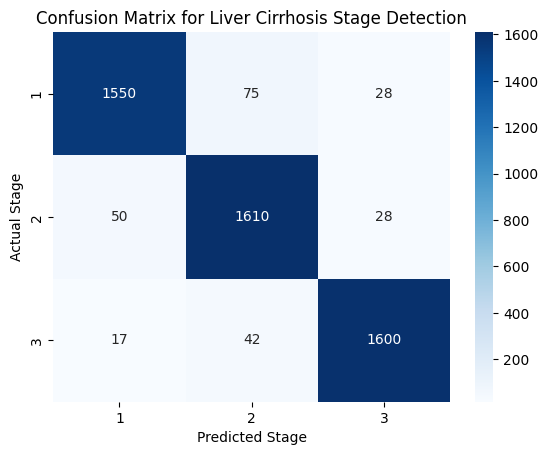

In [7]:
# --- 1. Import Libraries ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --- 2. Load Data ---
# IMPORTANT: Verify this path. Copy the file path from your Kaggle notebook's "Input" directory.
file_path = '/kaggle/input/liver-cihrrosis/liver_cirrhosis.csv'  # <-- ❗ VERIFY THIS PATH

try:
    df = pd.read_csv(file_path)
    print(f"✅ Successfully loaded data from '{file_path}'. Shape: {df.shape}")

    # --- 3. Data Preparation ---
    # The Kaggle dataset might contain an 'ID' column which is not useful for prediction.
    if 'ID' in df.columns:
        df = df.drop('ID', axis=1)

    if 'Stage' not in df.columns:
        raise ValueError("The target column 'Stage' was not found in the CSV file.")

    # Drop rows where the target 'Stage' is missing.
    df.dropna(subset=['Stage'], inplace=True)
    df['Stage'] = df['Stage'].astype(int)

    X = df.drop('Stage', axis=1)
    y = df['Stage']

    # Identify numerical and categorical features
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    categorical_features = X.select_dtypes(exclude=np.number).columns.tolist()

    # --- 4. Preprocessing Pipeline ---
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])

    preprocessor = ColumnTransformer(transformers=[
            ('num', numerical_transformer, numerical_features),
            ('cat', categorical_transformer, categorical_features)
        ], remainder='passthrough'
    )

    # --- 5. Model Building and Training ---
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    model.fit(X_train, y_train)
    print("✅ Model training complete.")

    # --- 6. Model Evaluation ---
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n📊 Model Accuracy: {accuracy:.2f}")

    print("\n📋 Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

    print("\n🤔 Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred, labels=sorted(y.unique()))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
    plt.xlabel('Predicted Stage')
    plt.ylabel('Actual Stage')
    plt.title('Confusion Matrix for Liver Cirrhosis Stage Detection')
    plt.show()

except FileNotFoundError:
    print(f"❌ Error: The file was not found at '{file_path}'.")
    print("Please make sure you have added the dataset to your notebook and that the path is correct.")
except Exception as e:
    print(f"An error occurred during the process: {e}")